In [1]:
import matplotlib.pyplot as plt
import torch
from torch import nn
import torchvision
import torch.optim as optim
import math
import torchvision.transforms as transforms
import numpy as np

device = torch.device('cuda')
print(torch.cuda.is_available())

True


## 不使用数据增强

In [2]:
def batch_data(X,batch_size,device=torch.device('cuda')):
    temp_x=[i[0] for i in X]
    data_x=torch.cat(temp_x).reshape(batch_size,-1,3,32,32)
    data_y=torch.tensor([i[1] for i in X]).reshape(batch_size,-1)
    return data_x.to(device),data_y.to(device)

# transform = transforms.Compose(
#     [transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform = transforms.Compose(
    [transforms.ToTensor()])  #不进行变换

mnist_train = torchvision.datasets.CIFAR10(
    root="../../data", train=True, transform=transform, download=True)
mnist_test = torchvision.datasets.CIFAR10(
    root="../../data", train=False, transform=transform, download=True)


def plot_res():
    fig,ax=plt.subplots(1,2)
    for i in range(len(loss_arr)):
        if(isinstance(loss_arr[i],np.ndarray)==False):
            loss_arr[i]=loss_arr[i].to(torch.device('cpu')).detach().numpy()

    ax[0].plot(range(len(loss_arr)),loss_arr)
    ax[1].plot(range(len(loss_arr)),acc_arr)

    plt.tight_layout()
    # plt.subplots_adjust(left=None, bottom=None, right=None, top=None, \
    #     wspace=0.45, hspace=None)
    ax[0].set_title("loss")
    ax[1].set_title("accuracy")
    plt.show()

def start_train():
    net.train()#启用 BatchNormalization 和 Dropout
    for i in range(epoch):
        for j in range(batch_size):
            optimizer.zero_grad()
            y_hat=net(train_x[j])
            l=loss(y_hat,train_y[j])
            l.backward()
            with torch.no_grad():
                optimizer.step()
        with torch.no_grad():
            cur_acc=calc_acc(test_x.reshape((-1,3,32,32)),test_y.reshape(-1,1),net)
        if(i%10==0):
            print(f'epoch {i} loss= {l:.3f} accuracy={cur_acc:.3f}')        
        loss_arr.append(l)
        acc_arr.append(cur_acc)
        
def calc_acc(X,y,net):
    tot=0
    res=net(X)
    for i in range(X.shape[0]):
        if(res[i].argmax().item()==y[i].item()):
            tot+=1
    return tot/X.shape[0]
        


100%|██████████| 170498071/170498071 [00:03<00:00, 48590230.53it/s]


Extracting ../../data/cifar-10-python.tar.gz to ../../data
Files already downloaded and verified


In [3]:
batch_size=100
(train_x,train_y)=batch_data(mnist_train,batch_size,device)
(test_x,test_y)=batch_data(mnist_test,batch_size,device)

test_x.shape

torch.Size([100, 100, 3, 32, 32])

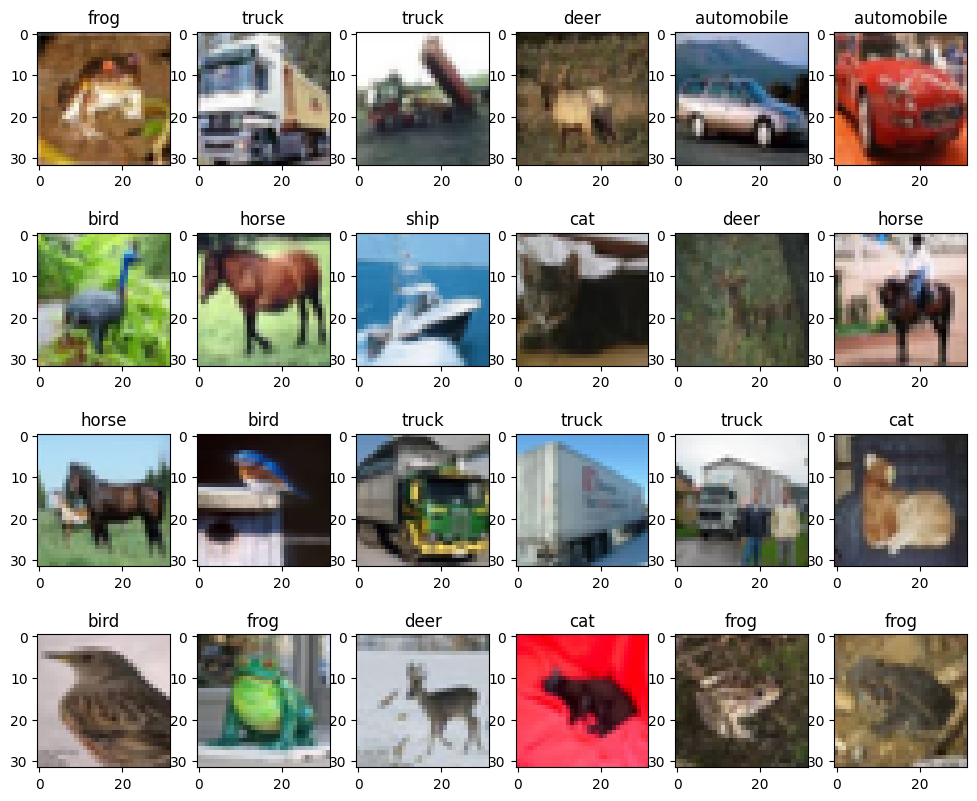

In [5]:
text_label = ["airplane"
                  ,"automobile"
                  ,"bird"
                  ,"cat"
                  ,"deer"
                  ,"dog"
                  ,"frog"
                  ,"horse"
                  ,"ship"
                  ,"truck"
                  ]

row_num=4
col_num=6
# plt.figure()
fig,ax=plt.subplots(row_num,col_num,figsize=(12,10),dpi=100)
for i in range(row_num):
    for j in range(col_num):
        data=train_x[0][col_num*i+j].cpu()
        ax[i,j].imshow(np.transpose(data, (1, 2, 0)))
        ax[i,j].set_title(text_label[train_y[0][col_num*i+j].cpu()])
plt.show()

自定义的简单卷积网络（Net类的第一个版本）：包含两个卷积层，后跟全连接层。

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # 32 to 28
        self.pool = nn.MaxPool2d(2, 2) # 14
        self.conv2 = nn.Conv2d(6, 16, 5) #10 maxpool 5
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.relu=nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net=Net()
loss_arr,acc_arr=[],[]
lr=0.001
epoch=150
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=lr, betas=(0.9, 0.98), eps=1e-9,weight_decay=0.0001)
loss=nn.CrossEntropyLoss()
start_train()

epoch 0 loss= 1.843 accuracy=0.337
epoch 10 loss= 1.291 accuracy=0.511
epoch 20 loss= 1.125 accuracy=0.571
epoch 30 loss= 1.018 accuracy=0.603
epoch 40 loss= 0.962 accuracy=0.619
epoch 50 loss= 0.851 accuracy=0.631
epoch 60 loss= 0.806 accuracy=0.632
epoch 70 loss= 0.768 accuracy=0.633
epoch 80 loss= 0.683 accuracy=0.629
epoch 90 loss= 0.640 accuracy=0.631
epoch 100 loss= 0.563 accuracy=0.636
epoch 110 loss= 0.575 accuracy=0.621
epoch 120 loss= 0.484 accuracy=0.624
epoch 130 loss= 0.449 accuracy=0.626
epoch 140 loss= 0.514 accuracy=0.613


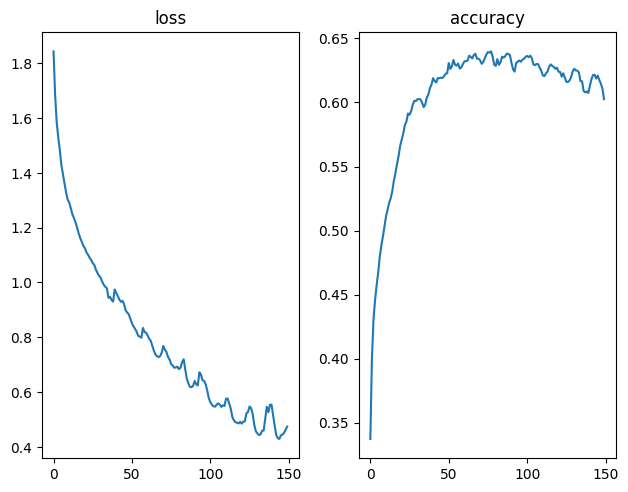

In [8]:
plot_res()

## 使用数据增强

In [15]:

def batch_data(X,batch_size,device=torch.device('cuda')):
    temp_x=[i[0] for i in X]
    data_x=torch.cat(temp_x).reshape(batch_size,-1,3,32,32)
    data_y=torch.tensor([i[1] for i in X]).reshape(batch_size,-1)
    return data_x.to(device),data_y.to(device)

# transform = transforms.Compose(
#     [transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # 随机翻转
    transforms.RandomRotation(10),  # 随机旋转10度
    transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),  # 变换
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # 滤镜
    transforms.ToTensor(),
])

mnist_train = torchvision.datasets.CIFAR10(
    root="../../data", train=True, transform=transform, download=True)
mnist_test = torchvision.datasets.CIFAR10(
    root="../../data", train=False, transform=transform, download=True)

        
batch_size=100
(train_x,train_y)=batch_data(mnist_train,batch_size,device)
(test_x,test_y)=batch_data(mnist_test,batch_size,device)


test_x.shape

Files already downloaded and verified
Files already downloaded and verified


torch.Size([100, 100, 3, 32, 32])

使用了数据增强技术，例如随机水平翻转、随机旋转、随机仿射变换和颜色抖动，这有助于提高模型的泛化能力。

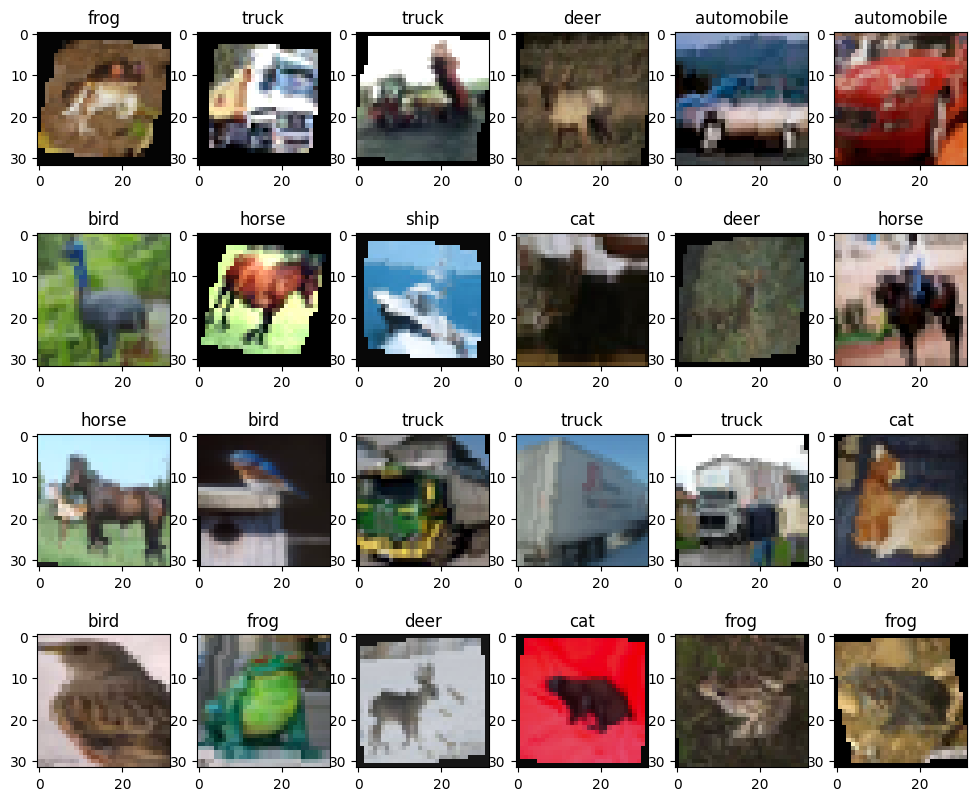

In [16]:
text_label = ["airplane"
                  ,"automobile"
                  ,"bird"
                  ,"cat"
                  ,"deer"
                  ,"dog"
                  ,"frog"
                  ,"horse"
                  ,"ship"
                  ,"truck"
                  ]

row_num=4
col_num=6
# plt.figure()
fig,ax=plt.subplots(row_num,col_num,figsize=(12,10),dpi=100)
for i in range(row_num):
    for j in range(col_num):
        data=train_x[0][col_num*i+j].cpu()
        ax[i,j].imshow(np.transpose(data, (1, 2, 0)))
        ax[i,j].set_title(text_label[train_y[0][col_num*i+j].cpu()])
plt.show()

添加了批量归一化和Dropout的改进网络（Net类的第二个版本）：在卷积层之后添加了批量归一化（BatchNorm）和Dropout层，以提高模型的鲁棒性和防止过拟合。

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.bn1 = nn.BatchNorm2d(16) # 正则化
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 64, 5)
        self.dropout = nn.Dropout(p=0.5)  # 加入 dropout
        self.bn2 = nn.BatchNorm2d(64) # 正则化
        self.fc1 = nn.Linear(64 * 5 * 5, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 84)
        self.fc4 = nn.Linear(84, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.dropout(x.view(-1, 64 * 5 * 5))
        x = self.relu(self.fc1(x))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.fc3(x)
        x = self.fc4(x)
        return x

net=Net()
loss_arr,acc_arr=[],[]
lr=0.001
epoch=150
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=lr, betas=(0.9, 0.98), eps=1e-9,weight_decay=0.0001)
loss=nn.CrossEntropyLoss()
start_train()

epoch 0 loss= 1.713 accuracy=0.360
epoch 10 loss= 1.087 accuracy=0.579
epoch 20 loss= 0.661 accuracy=0.603
epoch 30 loss= 0.545 accuracy=0.594
epoch 40 loss= 0.428 accuracy=0.590
epoch 50 loss= 0.367 accuracy=0.588
epoch 60 loss= 0.326 accuracy=0.582
epoch 70 loss= 0.280 accuracy=0.588
epoch 80 loss= 0.342 accuracy=0.594
epoch 90 loss= 0.303 accuracy=0.593
epoch 100 loss= 0.284 accuracy=0.589
epoch 110 loss= 0.295 accuracy=0.584
epoch 120 loss= 0.253 accuracy=0.578
epoch 130 loss= 0.221 accuracy=0.587
epoch 140 loss= 0.224 accuracy=0.583


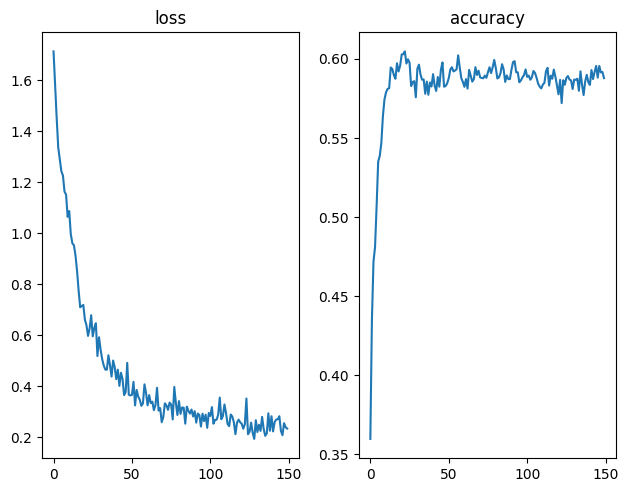

In [18]:
plot_res()

In [4]:
# 减小点batch
batch_size=50
(train_x,train_y)=batch_data(mnist_train,batch_size,device)
(test_x,test_y)=batch_data(mnist_test,batch_size,device)

test_x.shape

torch.Size([50, 200, 3, 32, 32])

## 不使用预训练

In [10]:
import torchvision.models as models

def start_train():
    net.train()#启用 BatchNormalization 和 Dropout
    for i in range(epoch):
        for j in range(batch_size):
            optimizer.zero_grad()
            y_hat=net(train_x[j])
            l=loss(y_hat,train_y[j])
            l.backward()
            with torch.no_grad():
                optimizer.step()
        with torch.no_grad():
            cur_acc=calc_acc(test_x[:2000].reshape((-1,3,32,32)),test_y[:2000].reshape(-1,1),net)
            loss_arr.append(l)
            acc_arr.append(cur_acc)
        if i%6==0:
            print(f'epoch {i} loss= {l:.3f} accuracy={cur_acc:.3f}')        
        

class Net(nn.Module):
    def __init__(self, num_classes=10):
        super(Net, self).__init__()
        # ResNet-18 模型
        self.resnet = models.resnet18(weights=None)
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)
        self.resnet.conv1 = nn.Conv2d(3, 64, 3, stride=1, padding=1, bias=False)  # 首层改成3x3卷积核
        self.resnet.maxpool = nn.MaxPool2d(1, 1, 0)  # 图像太小 本来就没什么特征 所以这里通过1x1的池化核让池化层失效

    def forward(self, x):
        return self.resnet(x)

net=Net()
loss_arr,acc_arr=[],[]
lr=0.001
epoch=60
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=lr, betas=(0.9, 0.98), eps=1e-9,weight_decay=0.0001)
loss=nn.CrossEntropyLoss()
start_train()

epoch 0 loss= 1.132 accuracy=0.596
epoch 6 loss= 0.198 accuracy=0.759
epoch 12 loss= 0.105 accuracy=0.769
epoch 18 loss= 0.061 accuracy=0.780
epoch 24 loss= 0.043 accuracy=0.775
epoch 30 loss= 0.044 accuracy=0.787
epoch 36 loss= 0.036 accuracy=0.795
epoch 42 loss= 0.031 accuracy=0.801
epoch 48 loss= 0.019 accuracy=0.800
epoch 54 loss= 0.023 accuracy=0.799


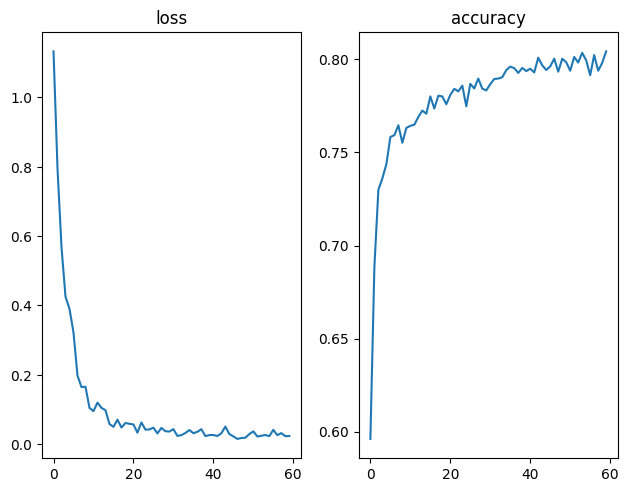

In [11]:
plot_res()

## 使用预训练模型

In [16]:
import torchvision.models as models

class Net(nn.Module):
    def __init__(self, num_classes=10):
        super(Net, self).__init__()
        # ResNet-18 模型
        self.resnet = models.resnet18(pretrained=True)
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)
        self.resnet.conv1 = nn.Conv2d(3, 64, 3, stride=1, padding=1, bias=False)  # 首层改成3x3卷积核
        self.resnet.maxpool = nn.MaxPool2d(1, 1, 0)  # 图像太小 本来就没什么特征 所以这里通过1x1的池化核让池化层失效

    def forward(self, x):
        return self.resnet(x)
    
net=Net()
loss_arr,acc_arr=[],[]
lr=0.001
epoch=60
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=lr, betas=(0.9, 0.98), eps=1e-9,weight_decay=0.0001)
loss=nn.CrossEntropyLoss()
start_train()

epoch 0 loss= 0.467 accuracy=0.844
epoch 6 loss= 0.050 accuracy=0.881
epoch 12 loss= 0.036 accuracy=0.893
epoch 18 loss= 0.026 accuracy=0.886
epoch 24 loss= 0.018 accuracy=0.888
epoch 30 loss= 0.021 accuracy=0.890
epoch 36 loss= 0.033 accuracy=0.887
epoch 42 loss= 0.017 accuracy=0.896
epoch 48 loss= 0.009 accuracy=0.897
epoch 54 loss= 0.022 accuracy=0.888


预训练的ResNet-18：使用预训练的ResNet-18模型，并替换最后的全连接层以适应CIFAR-10的10个类别。

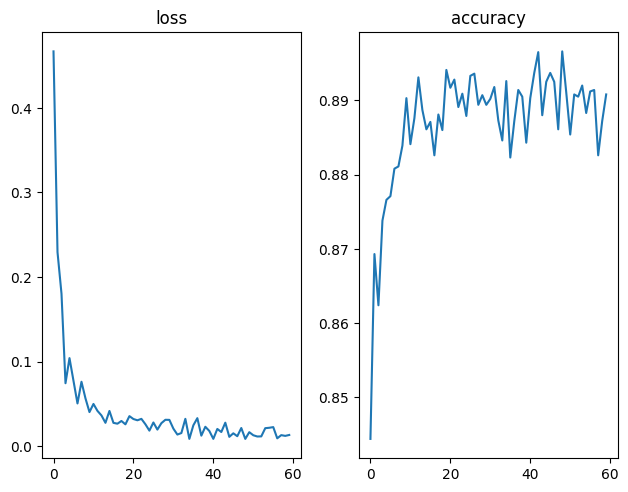

In [17]:
plot_res()

## 结果分析

自定义网络：在没有使用数据增强的情况下，准确率在大约60%左右波动。

改进的网络：使用数据增强后，准确率有所提高，但仍然在60%左右。

ResNet-18：使用预训练的ResNet-18模型，准确率显著提高，最终达到了约90%。

## 结论

数据增强对于提高模型性能是有效的，尤其是在没有大量数据的情况下。

预训练模型（如ResNet-18）在迁移学习中表现出色，能够快速适应新任务并取得很好的结果。

模型的性能可以通过调整网络结构、优化器参数和训练策略来进一步优化。